In [1]:
import pandas as pd
import datetime
from datetime import date
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../way-to-school-date/school_prep.csv")

In [3]:
print('Zbiór zawiera {} obserwacji i {} zmiennych'.format(df.shape[0], df.shape[1]))

Zbiór zawiera 55730 obserwacji i 71 zmiennych


In [4]:
print('Lista zmiennych w zbiorze {}'.format(df.columns))

Lista zmiennych w zbiorze Index(['numer_rspo', 'regon_podmiotu', 'nip_podmiotu', 'typ', 'nazwa',
       'kod_terytorialny_wojewodztwo', 'kod_terytorialny_powiat',
       'kod_terytorialny_gmina', 'kod_terytorialny_miejscowosc',
       'kod_terytorialny_ulica', 'wojewodztwo', 'powiat', 'gmina',
       'miejscowosc', 'rodzaj_miejscowosci', 'ulica', 'numer_budynku',
       'numer_lokalu', 'kod_pocztowy', 'poczta', 'telefon', 'faks', 'e-mail',
       'strona_www', 'publicznosc_status', 'kategoria_uczniow',
       'specyfika_placowki', 'imie_i_nazwisko_dyrektora', 'data_zalozenia',
       'data_rozpoczecia_dzialalnosci', 'data_likwidacji',
       'typ_organu_prowadzacego', 'nazwa_organu_prowadzacego',
       'regon_organu_prowadzacego', 'nip_organu_prowadzacego',
       'wojewodztwo_organu_prowadzacego', 'powiat_organu_prowadzacego',
       'gmina_organu_prowadzacego', 'miejsce_w_strukturze',
       'rspo_podmiotu_nadrzednego', 'typ_podmiotu_nadrzednego',
       'nazwa_podmiotu_nadrzednego'

In [5]:
print('Zbior zawiera {} duplikatow.'.format(df.duplicated().sum()))

Zbior zawiera 0 duplikatow.


In [6]:
print('Zbior zawiera {} zmiennych typu float'.format(len(df.select_dtypes('float64').columns)))

Zbior zawiera 12 zmiennych typu float


In [7]:
print('Zbior zawiera {} zmiennych typu int'.format(len(df.select_dtypes('int64').columns)))

Zbior zawiera 20 zmiennych typu int


In [8]:
print('Zbior zawiera {} zmiennych typu object'.format(len(df.select_dtypes('object').columns)))

Zbior zawiera 39 zmiennych typu object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55730 entries, 0 to 55729
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   numer_rspo                       55730 non-null  int64  
 1   regon_podmiotu                   55730 non-null  int64  
 2   nip_podmiotu                     28564 non-null  float64
 3   typ                              55730 non-null  object 
 4   nazwa                            55730 non-null  object 
 5   kod_terytorialny_wojewodztwo     55730 non-null  int64  
 6   kod_terytorialny_powiat          55730 non-null  int64  
 7   kod_terytorialny_gmina           55730 non-null  int64  
 8   kod_terytorialny_miejscowosc     55730 non-null  int64  
 9   kod_terytorialny_ulica           46086 non-null  float64
 10  wojewodztwo                      55730 non-null  object 
 11  powiat                           55730 non-null  object 
 12  gmina             

In [50]:
for col in df.select_dtypes(['object', 'category']):
    print(df[col].value_counts())

Szkoła podstawowa                                                            14461
Przedszkole                                                                  13802
Zespół szkół i placówek oświatowych                                           5245
Liceum ogólnokształcące                                                       4142
Placówka Kształcenia Ustawicznego - bez szkół                                 3060
Szkoła policealna                                                             2544
Branżowa szkoła I stopnia                                                     2138
Technikum                                                                     2006
Punkt przedszkolny                                                            1670
Poradnia psychologiczno-pedagogiczna                                          1195
Centrum Kształcenia Zawodowego                                                 581
Szkoła specjalna przysposabiająca do pracy                                     566
Szko

In [10]:
df.select_dtypes(['int', 'float']).columns

Index(['numer_rspo', 'regon_podmiotu', 'nip_podmiotu',
       'kod_terytorialny_wojewodztwo', 'kod_terytorialny_powiat',
       'kod_terytorialny_gmina', 'kod_terytorialny_miejscowosc',
       'kod_terytorialny_ulica', 'data_likwidacji',
       'regon_organu_prowadzacego', 'nip_organu_prowadzacego',
       'rspo_podmiotu_nadrzednego', 'liczba_uczniow', 'identyfikator_prov',
       'area_ha_prov', 'area_km_prov', 'population_total_prov',
       'population_per_1km_prov', 'rank_ha_prov', 'rank_population_prov',
       'identyfikator_dist', 'area_ha_dist', 'area_km_dist',
       'population_total_dist', 'population_per_1km_dist', 'rank_ha_dist',
       'rank_population_dist', 'identyfikator', 'area_ha', 'area_km',
       'population_total', 'population_per_1km'],
      dtype='object')

In [11]:
df.head(3)

,numer_rspo,regon_podmiotu,nip_podmiotu,typ,nazwa,kod_terytorialny_wojewodztwo,kod_terytorialny_powiat,kod_terytorialny_gmina,kod_terytorialny_miejscowosc,kod_terytorialny_ulica,...,rank_ha_dist,rank_population_dist,identyfikator,gminy_nazwa,area_ha,area_km,population_total,population_per_1km,rank_ha,rank_population
0,38801,650689,6.121863e+09,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 2 W BOLESŁAWCU,2,201,201011,935989,20291.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133
1,40746,21270766,6.121833e+09,Przedszkole,MIEJSKIE PRZEDSZKOLE PUBLICZNE NR 7 Z ODDZIAŁA...,2,201,201011,935989,5956.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133
2,17550,27192,6.121125e+09,Zespół szkół i placówek oświatowych,ZESPÓŁ SZKÓŁ ELEKTRONICZNYCH IM. I. DOMEYKI W ...,2,201,201011,935989,23260.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133


In [8]:
#df.agg(['mean', 'median', 'count'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
numer_rspo,55730.0,9.105552e+04,8.059559e+04,2.869000e+03,2.688150e+04,7.222700e+04,1.219508e+05,2.792130e+05
regon_podmiotu,55730.0,1.564177e+11,3.030666e+12,1.999100e+04,2.246521e+07,2.430894e+08,3.681990e+08,9.712719e+13
nip_podmiotu,28564.0,7.180181e+09,1.571380e+09,1.198970e+08,6.191914e+09,7.291405e+09,8.341037e+09,9.970157e+09
kod_terytorialny_wojewodztwo,55730.0,1.687447e+01,8.896610e+00,2.000000e+00,1.000000e+01,1.400000e+01,2.400000e+01,3.200000e+01
kod_terytorialny_powiat,55730.0,1.717044e+03,8.901736e+02,2.010000e+02,1.061000e+03,1.465000e+03,2.465000e+03,3.263000e+03
kod_terytorialny_gmina,55730.0,1.717084e+06,8.901705e+05,2.010110e+05,1.061049e+06,1.465188e+06,2.465011e+06,3.263011e+06
kod_terytorialny_miejscowosc,55730.0,7.879407e+05,2.841555e+05,4.600000e+01,6.785700e+05,9.361500e+05,9.658780e+05,1.067360e+06
kod_terytorialny_ulica,46086.0,1.659636e+04,1.067788e+04,4.000000e+00,8.986000e+03,1.572900e+04,2.197000e+04,5.823300e+04
data_likwidacji,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regon_organu_prowadzacego,47264.0,4.899429e+10,9.775225e+11,0.000000e+00,1.916751e+08,3.650005e+08,6.312587e+08,9.510756e+13


In [12]:
print(str(round(df.isnull().any(axis=0).sum()/df.shape[0]*100,2))+'% obserwacji zawiera braki w danych.')

0.05% obserwacji zawiera braki w danych.


In [13]:
nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
nulls_summary = nulls_summary[nulls_summary['Nulls']]
nulls_summary.sort_values('Num_of_nulls [%]', ascending=False)

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
data_likwidacji,True,55730,100.00
numer_lokalu,True,53091,95.26
nip_organu_prowadzacego,True,45100,80.93
tereny_sportowe,True,44343,79.57
rspo_podmiotu_nadrzednego,True,39671,71.18
nazwa_podmiotu_nadrzednego,True,39671,71.18
typ_podmiotu_nadrzednego,True,39671,71.18
faks,True,31347,56.25
nip_podmiotu,True,27166,48.75
imie_i_nazwisko_dyrektora,True,20852,37.42


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55730 entries, 0 to 55729
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   numer_rspo                       55730 non-null  int64   
 1   regon_podmiotu                   55730 non-null  int64   
 2   typ                              55730 non-null  category
 3   nazwa                            55730 non-null  object  
 4   kod_terytorialny_wojewodztwo     55730 non-null  int64   
 5   kod_terytorialny_powiat          55730 non-null  int64   
 6   kod_terytorialny_gmina           55730 non-null  int64   
 7   kod_terytorialny_miejscowosc     55730 non-null  int64   
 8   kod_terytorialny_ulica           46086 non-null  float64 
 9   wojewodztwo                      55730 non-null  category
 10  powiat                           55730 non-null  object  
 11  gmina                            55730 non-null  object  
 12  miej

In [103]:
pd.crosstab(df.wojewodztwo, df.wojewodztwo_nazwa)

wojewodztwo_nazwa,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
wojewodztwo,,,,,,,,,,,,,,,,
DOLNOŚLĄSKIE,3791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KUJAWSKO-POMORSKIE,0,2822,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LUBELSKIE,0,0,3205,0,0,0,0,0,0,0,0,0,0,0,0,0
LUBUSKIE,0,0,0,1390,0,0,0,0,0,0,0,0,0,0,0,0
MAZOWIECKIE,0,0,0,0,7935,0,0,0,0,0,0,0,0,0,0,0
MAŁOPOLSKIE,0,0,0,0,0,5458,0,0,0,0,0,0,0,0,0,0
OPOLSKIE,0,0,0,0,0,0,1544,0,0,0,0,0,0,0,0,0
PODKARPACKIE,0,0,0,0,0,0,0,3487,0,0,0,0,0,0,0,0
PODLASKIE,0,0,0,0,0,0,0,0,1646,0,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55730 entries, 0 to 55729
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   numer_rspo                       55730 non-null  int64   
 1   regon_podmiotu                   55730 non-null  int64   
 2   typ                              55730 non-null  category
 3   nazwa                            55730 non-null  object  
 4   kod_terytorialny_wojewodztwo     55730 non-null  int64   
 5   kod_terytorialny_powiat          55730 non-null  int64   
 6   kod_terytorialny_gmina           55730 non-null  int64   
 7   kod_terytorialny_miejscowosc     55730 non-null  int64   
 8   kod_terytorialny_ulica           46086 non-null  float64 
 9   wojewodztwo                      55730 non-null  category
 10  powiat                           55730 non-null  object  
 11  gmina                            55730 non-null  object  
 12  miej

In [15]:
black_list = ['data_likwidacji','nip_podmiotu','faks','imie_i_nazwisko_dyrektora','nip_organu_prowadzacego','wojewodztwo_nazwa','identyfikator','gminy_nazwa','area_ha','area_km',
'population_total','population_per_1km','rank_ha','rank_population','identyfikator_prov','powiaty_nazwa']

for i in black_list:
    if i in df.columns:
        df.drop(i, axis = 1, inplace = True)

In [17]:
col = df.select_dtypes('object').columns

In [18]:
for x in col:
    print('{}: {} unikalnych wartości.'.format(x, df[x].nunique()))

typ: 53 unikalnych wartości.
nazwa: 51158 unikalnych wartości.
wojewodztwo: 16 unikalnych wartości.
powiat: 370 unikalnych wartości.
gmina: 3084 unikalnych wartości.
miejscowosc: 8661 unikalnych wartości.
rodzaj_miejscowosci: 11 unikalnych wartości.
ulica: 7172 unikalnych wartości.
numer_budynku: 2223 unikalnych wartości.
numer_lokalu: 480 unikalnych wartości.
kod_pocztowy: 8499 unikalnych wartości.
poczta: 4213 unikalnych wartości.
telefon: 36066 unikalnych wartości.
e-mail: 35917 unikalnych wartości.
strona_www: 26715 unikalnych wartości.
publicznosc_status: 5 unikalnych wartości.
kategoria_uczniow: 3 unikalnych wartości.
specyfika_placowki: 2 unikalnych wartości.
data_zalozenia: 10566 unikalnych wartości.
data_rozpoczecia_dzialalnosci: 6840 unikalnych wartości.
typ_organu_prowadzacego: 28 unikalnych wartości.
nazwa_organu_prowadzacego: 13967 unikalnych wartości.
wojewodztwo_organu_prowadzacego: 16 unikalnych wartości.
powiat_organu_prowadzacego: 370 unikalnych wartości.
gmina_organu

In [19]:
for x in col:
    if df[x].nunique() <= 53:
        df[x] = df[x].astype('category')

In [62]:
for x in df.select_dtypes('int64').columns:
    if df[x].max() <= 127:
        print('{}: max {}'.format(x, df[x].max()))
    elif df[x].max() <= 32767:
        print('{}: max {}'.format(x, df[x].max()))

kod_terytorialny_wojewodztwo: max 32
kod_terytorialny_powiat: max 3263
population_per_1km_prov: max 364
rank_ha_prov: max 16
rank_population_prov: max 16
identyfikator_dist: max 3263
area_km_dist: max 2975
population_per_1km_dist: max 3690
rank_ha_dist: max 313
rank_population_dist: max 313
rok_zalozenia_cat: max 2022
school_age: max 440
school_age_map: max 150


In [66]:
for x in df.select_dtypes('int64').columns:
    if df[x].max() <= 127:
        df[x] = df[x].astype('int8')
    elif df[x].max() <= 32767:
        df[x] = df[x].astype('int16')
    elif df[x].max() <= 2147483647:
        df[x] = df[x].astype('int32')
    

In [68]:
df.shape

(55730, 59)

In [22]:
df["rok_zalozenia_cat"] = df["data_zalozenia"].map(lambda x: x.split("-")[0])
df["rok_zalozenia_cat"] = df["rok_zalozenia_cat"].astype("int")

In [23]:
rok_biezacy = date.today().year

In [24]:
df["school_age"] = int(rok_biezacy) - df["rok_zalozenia_cat"]

In [25]:
print('Liczba szkół i placowek oświatowych mających ponad 100 lat: {}'.format(df[df.school_age > 100]["numer_rspo"].count()))

Liczba szkół i placowek oświatowych mających ponad 100 lat: 1629


In [26]:

df.nlargest(15, columns='school_age', keep='first')[['typ', 'nazwa','school_age','data_zalozenia','wojewodztwo','miejscowosc']]

,typ,nazwa,school_age,data_zalozenia,wojewodztwo,miejscowosc
8063,Placówka Kształcenia Ustawicznego - bez szkół,FEDERACJA STOWARZYSZEŃ NAUKOWO- TECHNICZNYCH N...,440,1582-01-01,WIELKOPOLSKIE,Piła
10312,Liceum ogólnokształcące,LICEUM OGÓLNOKSZTAŁCĄCE ŚW. MARII MAGDALENY,440,1582-01-01,WIELKOPOLSKIE,Poznań
25097,Szkoła podstawowa,SZKOŁA PODSTAWOWA W BRAŃSKU,440,1582-01-01,PODLASKIE,Brańsk
31364,Szkoła podstawowa,SZKOŁA PODSTAWOWA W RZEGNOWIE,440,1582-01-01,MAZOWIECKIE,Rzęgnowo
35704,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 293 IM. JANA KOCHANOWSKIEGO,440,1582-01-01,MAZOWIECKIE,Bielany
41362,Szkoła podstawowa,SZKOŁA PODSTAWOWA W ŁĄCKU,440,1582-01-01,MAŁOPOLSKIE,Łącko
42582,Szkoła podstawowa,SZKOŁA PODSTAWOWA IM. STANISŁAWA STASZICA W TU...,440,1582-01-01,MAŁOPOLSKIE,Tuchów
44176,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 7 IM. WOJSKA POLSKIEGO W ...,440,1582-01-01,MAŁOPOLSKIE,Kraków-Śródmieście
44746,Liceum ogólnokształcące,I LICEUM OGÓLNOKSZTAŁCĄCE IM.K.BRODZIŃSKIEGO W...,440,1582-01-01,MAŁOPOLSKIE,Tarnów
52196,Liceum ogólnokształcące,I LICEUM OGÓLNOKSZTAŁCĄCE IM.STANISŁAWA STASZI...,440,1582-01-01,LUBELSKIE,Lublin


In [28]:
age_max = df["school_age"].max()

step = 25

def prep(x):

    diff = range(0, age_max, step)
    for i in diff:
        if x >= i and x < i + step:
            return i


df["school_age_map"] = df["school_age"].map(prep)

In [29]:
df["school_age_map"] = df["school_age"].map(lambda x: 150 if x >= 150 else x)

In [33]:
avg_age = df.school_age.mean()
print('średni wiek szkoly: {}'.format(round(avg_age,2)))

średni wiek szkoly: 28.47


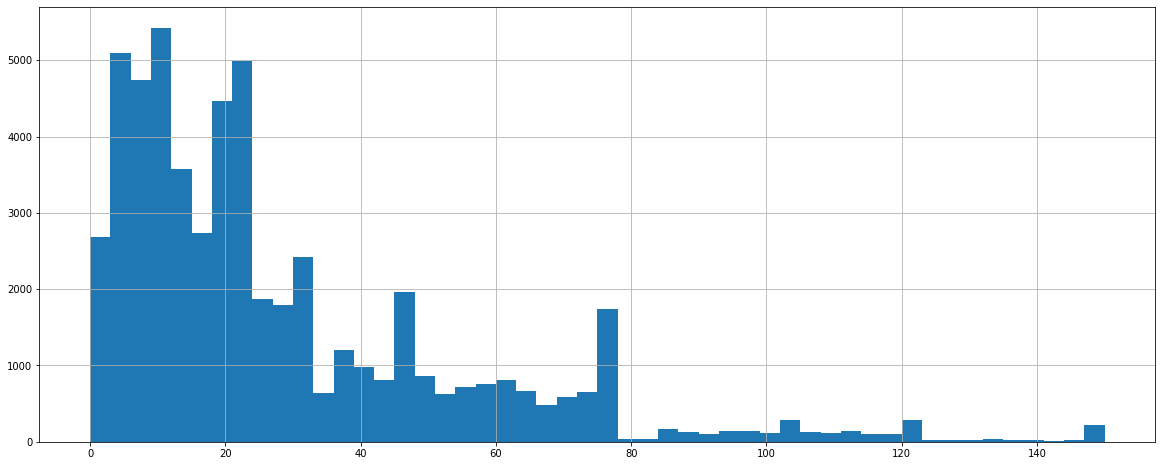

In [54]:
avg_age = df.school_age.mean()

df.school_age_map.hist(bins=50, figsize=(20, 8));

In [14]:
# df['data_rozpoczecia_dzialalnosci']  =  pd.to_datetime(df['data_rozpoczecia_dzialalnosci'], errors = 'coerce')
# df['data_zalozenia']  =  pd.to_datetime(df['data_zalozenia'], errors = 'coerce')

In [69]:
df.select_dtypes("object").columns

Index(['nazwa', 'powiat', 'gmina', 'miejscowosc', 'ulica', 'numer_budynku',
       'numer_lokalu', 'kod_pocztowy', 'poczta', 'telefon', 'e-mail',
       'strona_www', 'data_zalozenia', 'data_rozpoczecia_dzialalnosci',
       'nazwa_organu_prowadzacego', 'powiat_organu_prowadzacego',
       'gmina_organu_prowadzacego', 'nazwa_podmiotu_nadrzednego',
       'tereny_sportowe', 'jezyki_nauczane', 'gmina_cat'],
      dtype='object')

In [70]:
df_agg_prov = (
    df.groupby(["wojewodztwo"])
    .agg(
        school_count=("numer_rspo", "count"), area_ha_prov=("area_ha_prov", "max"), area_km_prov=("area_km_prov", "max")
    )
    .reset_index()
)

In [71]:
df_agg_prov["school_count_area"] = df_agg_prov["school_count"] / df_agg_prov["area_km_prov"]

In [72]:
df_agg_prov.sort_values(by="school_count_area", ascending=False)

,wojewodztwo,school_count,area_ha_prov,area_km_prov,school_count_area
14,ŚLĄSKIE,6133,1233309,12333,0.497284
5,MAŁOPOLSKIE,5458,1518279,15183,0.359481
4,MAZOWIECKIE,7935,3555847,35559,0.223150
7,PODKARPACKIE,3487,1784576,17846,0.195394
0,DOLNOŚLĄSKIE,3791,1994670,19947,0.190054
13,ŁÓDZKIE,3401,1821895,18219,0.186673
9,POMORSKIE,3345,1832368,18323,0.182557
11,WIELKOPOLSKIE,5254,2982650,29826,0.176155
15,ŚWIĘTOKRZYSKIE,1981,1171050,11710,0.169172
6,OPOLSKIE,1544,941187,9412,0.164046


In [73]:
df_agg_dist = (
    df.groupby(["powiat", "wojewodztwo"])
    .agg(
        school_count=("numer_rspo", "count"), area_ha_dist=("area_ha_dist", "max"), area_km_dist=("area_km_dist", "max")
    )
    .reset_index()
)

df_agg_dist["school_count_area"] = df_agg_dist["school_count"] / df_agg_dist["area_km_dist"]

In [74]:
df_agg_dist.sort_values(by="school_count_area", ascending=False)[:15]

,powiat,wojewodztwo,school_count,area_ha_dist,area_km_dist,school_count_area
868,Warszawa,MAZOWIECKIE,2627,51724.0,517.0,5.081238
24,Białystok,PODLASKIE,499,10213.0,102.0,4.892157
946,Zamość,LUBELSKIE,136,3034.0,30.0,4.533333
676,Siedlce,MAZOWIECKIE,145,3186.0,32.0,4.531250
110,Chorzów,ŚLĄSKIE,144,3324.0,33.0,4.363636
793,Słupsk,POMORSKIE,187,4315.0,43.0,4.348837
490,Olsztyn,WARMIŃSKO-MAZURSKIE,358,8833.0,88.0,4.068182
434,Lublin,LUBELSKIE,580,14747.0,148.0,3.918919
729,Sopot,POMORSKIE,66,1728.0,17.0,3.882353
373,Kraków,MAŁOPOLSKIE,1221,32685.0,327.0,3.733945


In [28]:
df_agg_dist.sort_values(by="school_count_area", ascending=True)[:10]

,powiat,wojewodztwo,school_count,area_ha_dist,area_km_dist,school_count_area
4264,sejneński,PODLASKIE,26,85517.0,855.0,0.030409
1976,hajnowski,PODLASKIE,50,162353.0,1624.0,0.030788
4600,suwalski,PODLASKIE,43,130700.0,1307.0,0.032900
1143,bieszczadzki,PODKARPACKIE,38,113907.0,1139.0,0.033363
4563,sulęciński,LUBUSKIE,42,117780.0,1178.0,0.035654
1610,elbląski,WARMIŃSKO-MAZURSKIE,53,141558.0,1416.0,0.037429
5564,łobeski,ZACHODNIOPOMORSKIE,41,106513.0,1065.0,0.038498
3064,moniecki,PODLASKIE,54,138179.0,1382.0,0.039074
2348,koszaliński,ZACHODNIOPOMORSKIE,65,165346.0,1653.0,0.039322
1096,białostocki,PODLASKIE,118,297644.0,2975.0,0.039664


In [29]:
dict_typ = {
    "Szkoła podstawowa": "Szkoła podstawowa",
    "Przedszkole": "Przedszkole",
    "Liceum ogólnokształcące": "Liceum ogólnokształcące",
    "Placówka Kształcenia Ustawicznego - bez szkół": "Other",
    "Szkoła policealna": "Other",
    "Branżowa szkoła I stopnia": "Branżowa szkoła I stopnia",
    "Technikum": "Technikum",
    "Punkt przedszkolny": "Przedszkole",
    "Poradnia psychologiczno-pedagogiczna": "Other",
    "Centrum Kształcenia Zawodowego": "Other",
    "Szkoła specjalna przysposabiająca do pracy": "Other",
    "Szkoła muzyczna I stopnia": "Szkoła muzyczna I stopnia",
    "Branżowa szkoła II stopnia": "Branżowa szkoła II stopnia",
    "Placówka doskonalenia nauczycieli": "Other",
    "Niepubliczna placówka oświatowo-wychowawcza w systemie oświaty": "Other",
    "Specjalny Ośrodek Szkolno-Wychowawczy": "Other",
    "Zespół szkół i placówek oświatowych": "Zespół szkół i placówek oświatowych",
    "Szkolne schronisko młodzieżowe": "Other",
    "Biblioteki pedagogiczne": "Other",
    "Ośrodek Rewalidacyjno-Wychowawczy": "Other",
    "Bursa": "Other",
    "Szkoła muzyczna II stopnia": "Szkoła muzyczna II stopnia",
    "Placówka Kształcenia Ustawicznego ze szkołami": "Placówka Kształcenia Ustawicznego ze szkołami",
    "Młodzieżowy dom kultury": "Other",
    "Młodzieżowy Ośrodek Wychowawczy": "Other",
    "Niepubliczna placówka kształcenia ustawicznego i praktycznego": "Niepubliczna placówka kształcenia ustawicznego i praktycznego",
    "Młodzieżowy Ośrodek Socjoterapii ze szkołami": "Młodzieżowy Ośrodek Socjoterapii ze szkołami",
    "Zespół wychowania przedszkolnego": "Przedszkole",
    "Liceum sztuk plastycznych": "Liceum sztuk plastycznych",
    "Poradnia specjalistyczna": "Other",
    "Ogólnokształcąca szkoła muzyczna I stopnia": "Ogólnokształcąca szkoła muzyczna I stopnia",
    "Ognisko pracy pozaszkolnej": "Other",
    "Międzyszkolny ośrodek sportowy": "Other",
    "Placówki artystyczne (ognisko artystyczne)": "Other",
    "Policealna szkoła plastyczna": "Other",
    "Ogólnokształcąca szkoła muzyczna II stopnia": "Ogólnokształcąca szkoła muzyczna II stopnia",
    "Specjalny Ośrodek Wychowawczy": "Other",
    "Dom wczasów dziecięcych": "Other",
    "Pozaszkolna placówka specjalistyczna": "Other",
    "Ogólnokształcąca szkoła sztuk pięknych": "Ogólnokształcąca szkoła sztuk pięknych",
    "Pałac młodzieży": "Other",
    "Szkoła sztuki tańca": "Szkoła sztuki tańca",
    "Inna szkoła artystyczna": "Inna szkoła artystyczna",
    "Policealna szkoła muzyczna": "Other",
    "Ogród jordanowski": "Other",
    "Gimnazjum": "Gimnazium",
    "Ogólnokształcąca szkoła baletowa": "Ogólnokształcąca szkoła baletowa",
    "Kolegium Pracowników Służb Społecznych": "Other",
    "Niepubliczna placówka kształcenia ustawicznego i praktycznego ze szkołami": "Niepubliczna placówka kształcenia ustawicznego i praktycznego ze szkołami",
    "Centrum Kształcenia Praktycznego": "Other",
    "Poznańska szkoła chóralna": "Poznańska szkoła chóralna",
    "Szkoła sztuki cyrkowej": "Szkoła sztuki cyrkowej",
    "Bednarska Szkoła Realna": "Bednarska Szkoła Realna",
}

In [30]:
df["typ_cat"] = df["typ"].map(dict_typ)

In [42]:
pd.DataFrame(df["typ_cat"].value_counts())

,typ_cat
Przedszkole,15549
Szkoła podstawowa,14461
Other,10611
Zespół szkół i placówek oświatowych,5245
Liceum ogólnokształcące,4142
Branżowa szkoła I stopnia,2138
Technikum,2006
Szkoła muzyczna I stopnia,487
Branżowa szkoła II stopnia,420
Szkoła muzyczna II stopnia,139
